In [1]:
#env geo_env
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import csv
import xarray as xr
import pandas as pd
from tqdm import tqdm
import geopandas as gpd
import matplotlib.colors as mcolors
import sys
from itertools import product

sys.path.append('./Tools')
from TransmissionTools import GetBestTransmission
from GeneralGeoTools import PlotGeneralGeoData, PlotGeneralGeoData_Class

# Define and Optimize the Transmission System

In [2]:
#Parameters
InputDataPath="./InputData"

GeoDataPath=InputDataPath+"/CoastLine/"
AC_DataPath=InputDataPath+"/Transmission/AC_Cables_Param.xlsx"
DC_DataPath=InputDataPath+"/Transmission/DC_Cables_Param.xlsx"
PlotPaths="./OutputData/Plots/"

In [5]:
RatedPower_Generation=15#[MW] #Maximum amout of power the transmission line can carry
BestTransmissionParams=GetBestTransmission(InputDataPath, AC_DataPath, DC_DataPath, RatedPower_Generation, LatMaxMin=(33.5, 37), LongMaxMin=(-78.5, -74.5), StepsPerDegree=10, SavePath="./OutputData/Transmission/Transmission_"+str(RatedPower_Generation)+"MW.npz")

RatedPower_Generation=60#[MW] #Maximum amout of power the transmission line can carry
BestTransmissionParams=GetBestTransmission(InputDataPath, AC_DataPath, DC_DataPath, RatedPower_Generation, LatMaxMin=(33.5, 37), LongMaxMin=(-78.5, -74.5), StepsPerDegree=10, SavePath="./OutputData/Transmission/Transmission_"+str(RatedPower_Generation)+"MW.npz")

RatedPower_Generation=100#[MW] #Maximum amout of power the transmission line can carry
BestTransmissionParams=GetBestTransmission(InputDataPath, AC_DataPath, DC_DataPath, RatedPower_Generation, LatMaxMin=(33.5, 37), LongMaxMin=(-78.5, -74.5), StepsPerDegree=10, SavePath="./OutputData/Transmission/Transmission_"+str(RatedPower_Generation)+"MW.npz")

RatedPower_Generation=300#[MW] #Maximum amout of power the transmission line can carry
BestTransmissionParams=GetBestTransmission(InputDataPath, AC_DataPath, DC_DataPath, RatedPower_Generation, LatMaxMin=(33.5, 37), LongMaxMin=(-78.5, -74.5), StepsPerDegree=10, SavePath="./OutputData/Transmission/Transmission_"+str(RatedPower_Generation)+"MW.npz")

RatedPower_Generation=600#[MW] #Maximum amout of power the transmission line can carry
BestTransmissionParams=GetBestTransmission(InputDataPath, AC_DataPath, DC_DataPath, RatedPower_Generation, LatMaxMin=(33.5, 37), LongMaxMin=(-78.5, -74.5), StepsPerDegree=10, SavePath="./OutputData/Transmission/Transmission_"+str(RatedPower_Generation)+"MW.npz")

RatedPower_Generation=1000#[MW] #Maximum amout of power the transmission line can carry
BestTransmissionParams=GetBestTransmission(InputDataPath, AC_DataPath, DC_DataPath, RatedPower_Generation, LatMaxMin=(33.5, 37), LongMaxMin=(-78.5, -74.5), StepsPerDegree=10, SavePath="./OutputData/Transmission/Transmission_"+str(RatedPower_Generation)+"MW.npz")

RatedPower_Generation=1200#[MW] #Maximum amout of power the transmission line can carry
BestTransmissionParams=GetBestTransmission(InputDataPath, AC_DataPath, DC_DataPath, RatedPower_Generation, LatMaxMin=(33.5, 37), LongMaxMin=(-78.5, -74.5), StepsPerDegree=10, SavePath="./OutputData/Transmission/Transmission_"+str(RatedPower_Generation)+"MW.npz")


 Calculating distance to shore for viable site locations


100%|██████████| 76/76 [00:01<00:00, 54.47it/s]



 Calculating water depth at each point


100%|██████████| 543/543 [00:03<00:00, 138.36it/s]



 Calculating distance to shore for viable site locations


100%|██████████| 76/76 [00:01<00:00, 54.28it/s]



 Calculating water depth at each point


100%|██████████| 543/543 [00:03<00:00, 138.08it/s]



 Calculating distance to shore for viable site locations


100%|██████████| 76/76 [00:01<00:00, 55.02it/s]



 Calculating water depth at each point


100%|██████████| 543/543 [00:03<00:00, 140.22it/s]



 Calculating distance to shore for viable site locations


100%|██████████| 76/76 [00:01<00:00, 54.24it/s]



 Calculating water depth at each point


100%|██████████| 543/543 [00:03<00:00, 138.43it/s]



 Calculating distance to shore for viable site locations


100%|██████████| 76/76 [00:01<00:00, 55.26it/s]



 Calculating water depth at each point


100%|██████████| 543/543 [00:03<00:00, 140.18it/s]



 Calculating distance to shore for viable site locations


100%|██████████| 76/76 [00:01<00:00, 54.55it/s]



 Calculating water depth at each point


100%|██████████| 543/543 [00:03<00:00, 139.86it/s]



 Calculating distance to shore for viable site locations


100%|██████████| 76/76 [00:01<00:00, 54.00it/s]



 Calculating water depth at each point


100%|██████████| 543/543 [00:03<00:00, 141.09it/s]


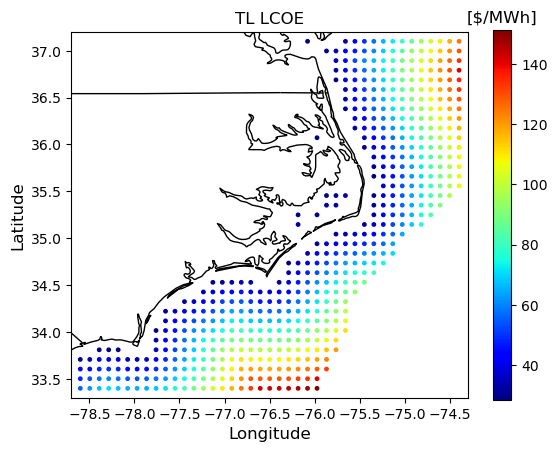

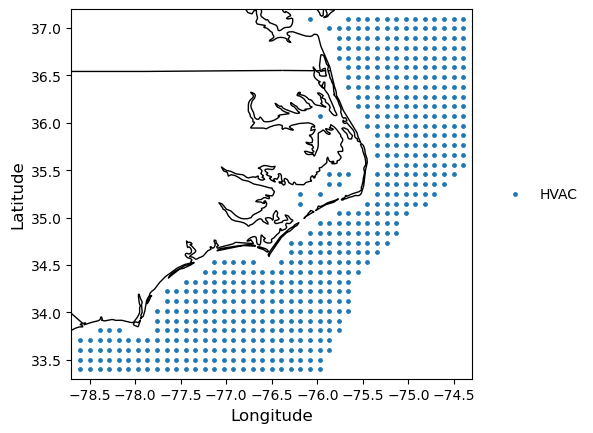

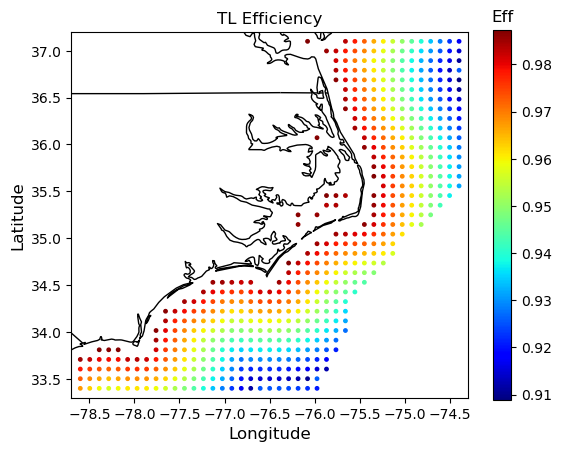

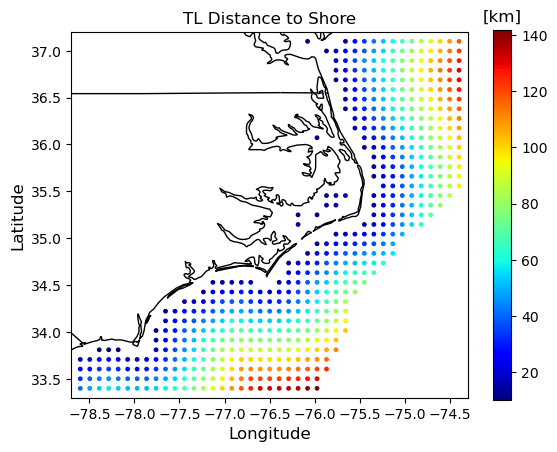

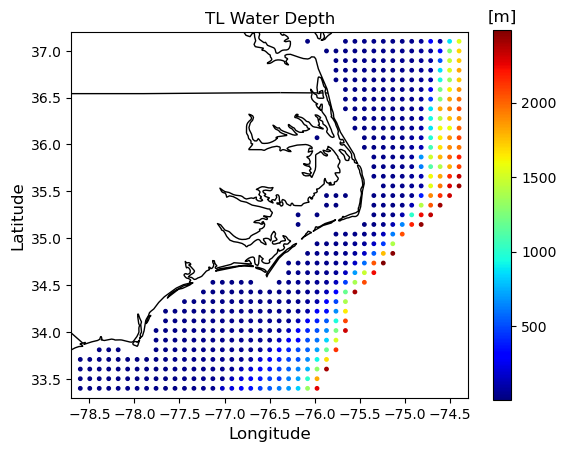

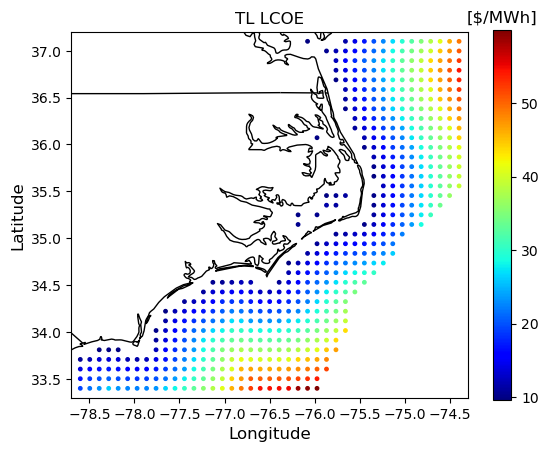

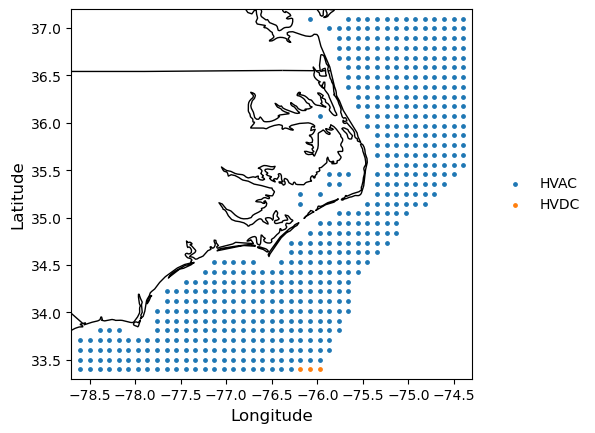

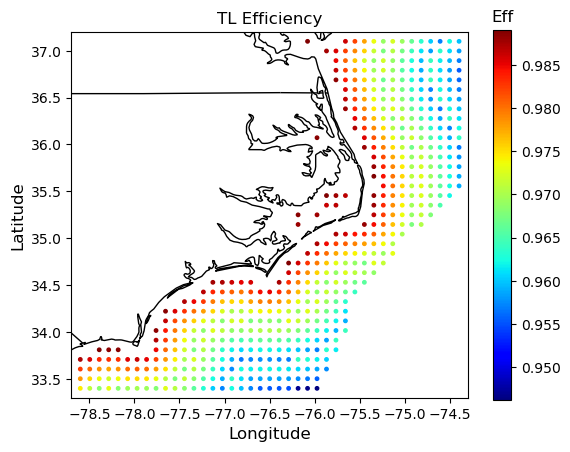

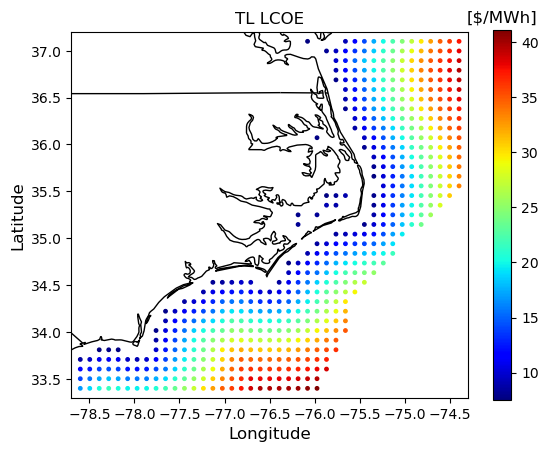

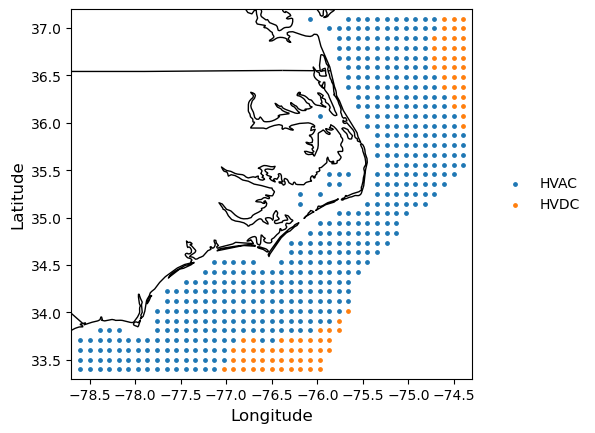

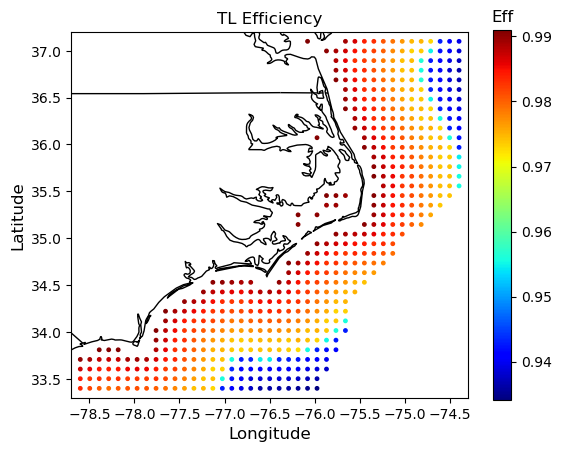

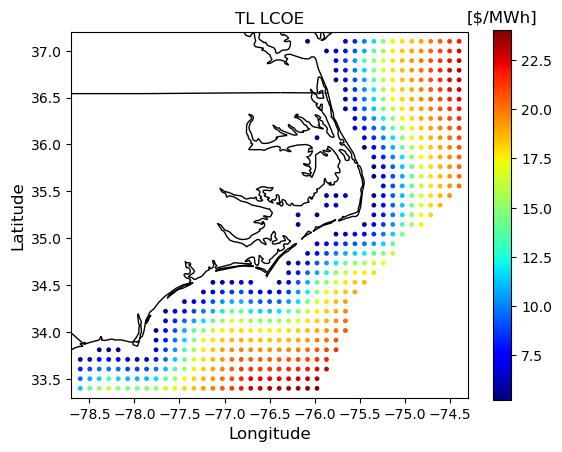

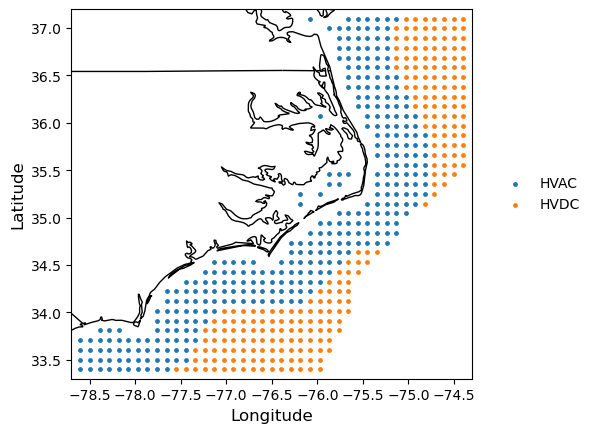

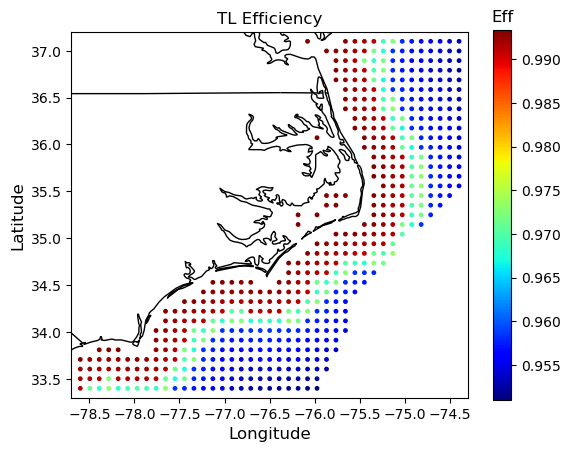

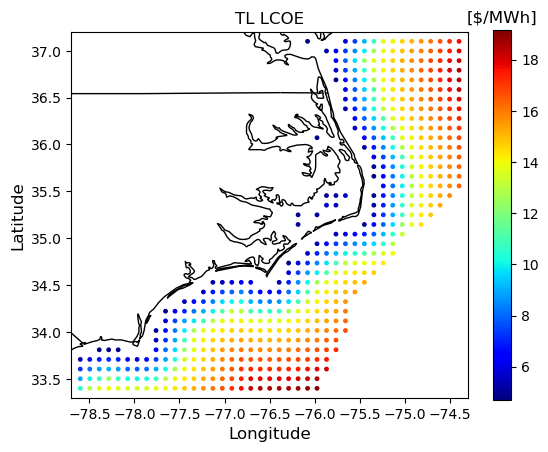

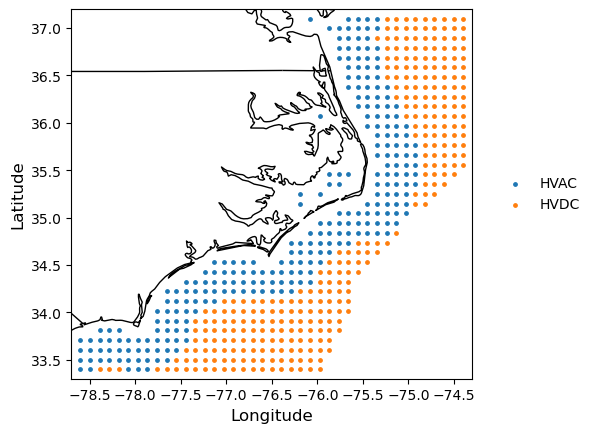

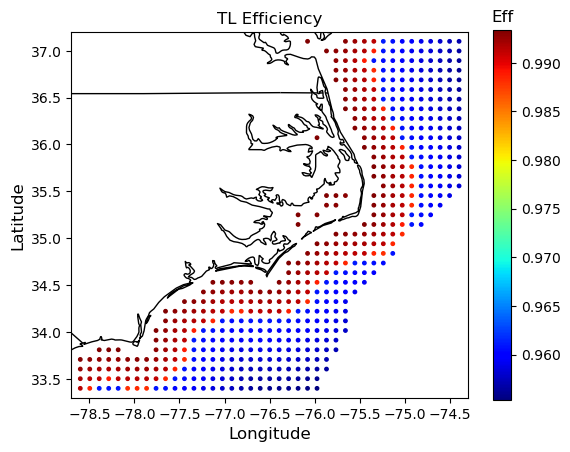

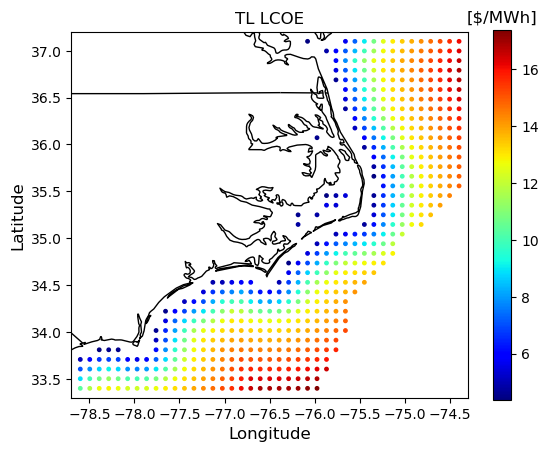

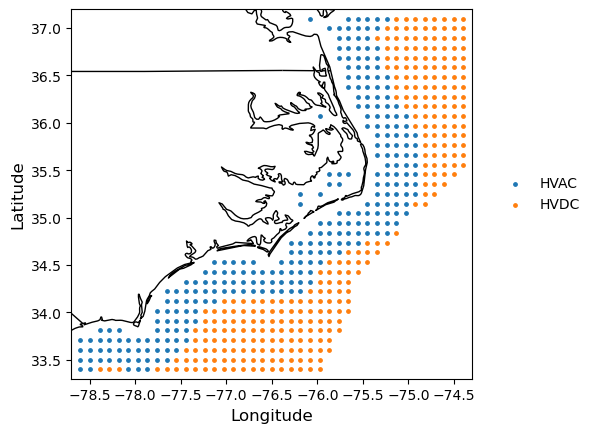

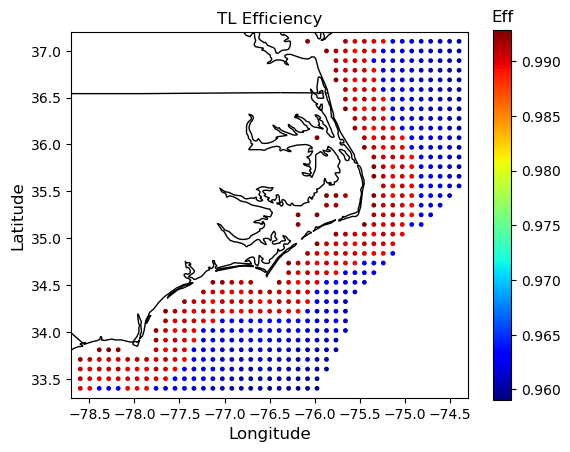

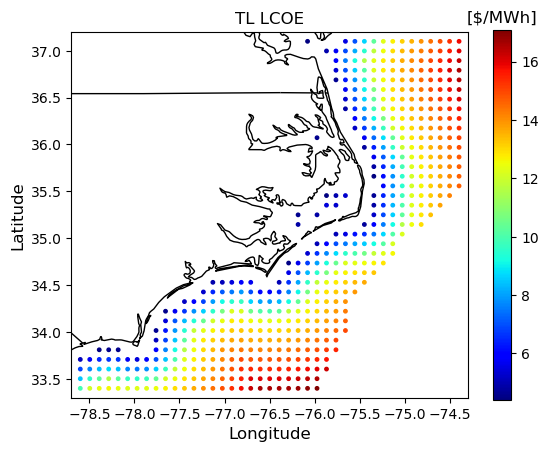

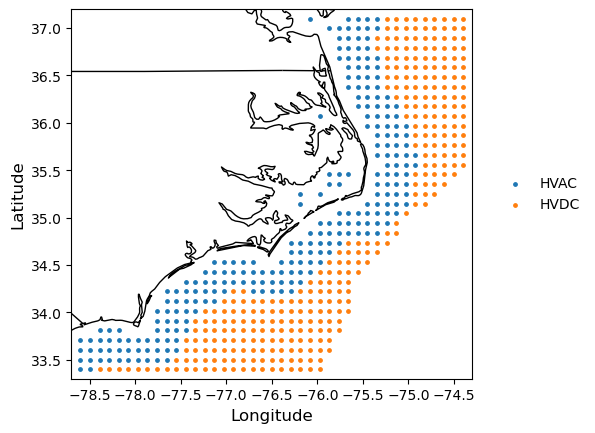

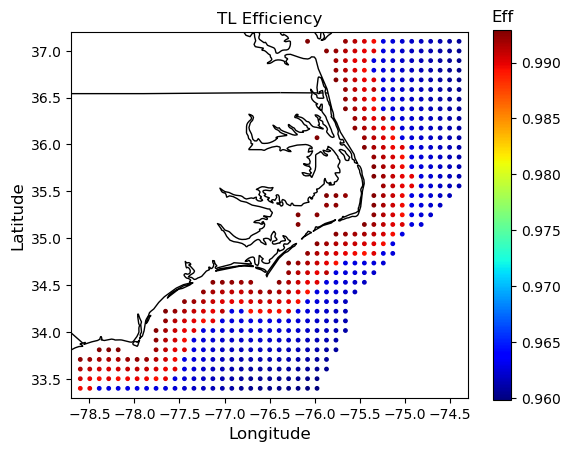

In [7]:
RatedPower_Generation=1200

for RatedPower_Generation in [15, 60, 100, 300, 600, 1000,1200]:

    Data=np.load("./OutputData/Transmission/Transmission_"+str(RatedPower_Generation)+"MW.npz",allow_pickle=True)
    BestTransmissionParams=Data["TransmissionLineParameters"].item()

    PlotGeneralGeoData(BestTransmissionParams["TL_LatLong"], BestTransmissionParams["LCOE_SimpleApproximation"], GeoDataPath, ColorBarTitle="[$/MWh]", Title="TL LCOE", SavePath=PlotPaths+"/Transmission/TL_LCOE_"+str(RatedPower_Generation)+"MW", s=6, LatMaxMin=(33.3, 37.2), LongMaxMin=(-78.7, -74.3))
    PlotGeneralGeoData_Class(BestTransmissionParams["TL_LatLong"], BestTransmissionParams["S_Mode"], GeoDataPath, Title=None, SavePath=PlotPaths+"/Transmission/TL_ModeOfTransmission_"+str(RatedPower_Generation)+"MW", s=6, LatMaxMin=(33.3, 37.2), LongMaxMin=(-78.7, -74.3))
    PlotGeneralGeoData(BestTransmissionParams["TL_LatLong"], BestTransmissionParams["S_Efficiency"], GeoDataPath, ColorBarTitle="Eff", Title="TL Efficiency", SavePath=PlotPaths+"/Transmission/TL_Efficiency_"+str(RatedPower_Generation)+"MW", s=6, LatMaxMin=(33.3, 37.2), LongMaxMin=(-78.7, -74.3))

    # PlotGeneralGeoData(BestTransmissionParams["TL_LatLong"], BestTransmissionParams["TL_ShoreDistance"], GeoDataPath, ColorBarTitle="[km]", Title="TL Distance to Shore", s=6, LatMaxMin=(33.3, 37.2), LongMaxMin=(-78.7, -74.3))
    # PlotGeneralGeoData(BestTransmissionParams["TL_LatLong"], BestTransmissionParams["TL_Depth"], GeoDataPath, ColorBarTitle="[m]", Title="TL Water Depth",  s=6, LatMaxMin=(33.3, 37.2), LongMaxMin=(-78.7, -74.3))

    if RatedPower_Generation==15:
        PlotGeneralGeoData(BestTransmissionParams["TL_LatLong"], BestTransmissionParams["TL_ShoreDistance"], GeoDataPath, ColorBarTitle="[km]", Title="TL Distance to Shore", SavePath=PlotPaths+"/Transmission/TL_Km2Shore_"+str(RatedPower_Generation)+"MW", s=6, LatMaxMin=(33.3, 37.2), LongMaxMin=(-78.7, -74.3))
        PlotGeneralGeoData(BestTransmissionParams["TL_LatLong"], BestTransmissionParams["TL_Depth"], GeoDataPath, ColorBarTitle="[m]", Title="TL Water Depth", SavePath=PlotPaths+"/Transmission/TL_WaterDepth_"+str(RatedPower_Generation)+"MW", s=6, LatMaxMin=(33.3, 37.2), LongMaxMin=(-78.7, -74.3))